# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Oct 9 (Friday) 11:00 pm </b> </font>

<font color="blue"> Sapna Pareek </font>

# I. Introduction

The main objective of the Assignment Linear Regression is to understand about the Linear Regression model and its application, how linear model can be utilised to solve the linear problems on the real world dataset. In this assignment we will understand how the linear regression code works. We will also learn about the implementation of the LS and LMS methods. Using linear regression, we can predict the data using historical data set. Linear regression equation is expressed as **Y = mx + C**. Where Y is the target (dependent variable), m is the slope and X (explanatory variable) is the input. And Linear model is the dot product of the two vectors which can be represented as: -

$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

Here w represents as weight vector and x represent as the input vector.

Linear regression is a linear model. Relationship between the input variable x and the output variable y is linear. Linear regression model is a simple model. For this assignment we will introduce our data and visualize that data for better understanding. We will apply **LS (least square)** and **LMS(Least mean square)** methods to get the better results to train our data and get the correct predictions. These are the most common methods for fitting a regression line. LS and LMS methods are used to calculate the best fitting line for the data by minimizing the sum of the squares of the vertical deviations from each data point to the line. Because deviations are first squared and then summed so there is no cancellation happens for positive and negative data points. Both the methods will be discussed in detail in the later section and comparison of the results will be done.

# II. Data

### II.1. Description

Data set for Regression used is related to the bike sharing rental process. Nowadays over 500 application are there for bike sharing. Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Using this data set we can infer that how the environmental and seasonal settings affect the bike sharing count. Below is the information about the dataset: -
          
**Dataset name**: hour.csv

**Number of features**: 17

**Number of Instances**: 17379
         
**Information about features**: -
1. instant: record index
2. dteday : date
3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. hr : hour (0 to 23)
7. holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
8. weekday : day of the week
9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
12. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
13. hum: Normalized humidity. The values are divided to 100 (max)
14. windspeed: Normalized wind speed. The values are divided to 67 (max)
15. casual: count of casual users
16. registered: count of registered users
17. cnt: count of total rental bikes including both casual and registered

# Source

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

Original Source: http://capitalbikeshare.com/system-data
Weather Information: http://www.freemeteo.com
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule 

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### II.1.a. Reading the Data

Bike sharing data set is present in the "hour.csv" file. we will read the data using the pandas function read_csv to read the data.

In [3]:
df_Reg = pd.read_csv("hour.csv")
df_Reg

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### II.2. Pre-processing of the Data

Using data pre-processing we transform raw data in useful and efficient format. We will check if any null values are there and do the statistical analysis of the data using the describe and info functions.

In [4]:
df_Reg.any().isnull()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [5]:
df_Reg.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df_Reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### II.3. Visualization of the Data

Data visualization is a method to extract the information about the data using the graphical representation of data. Here for visualizing the Regression data set we will use matplotlib and seaborn libraries. Using the mentioned libraries, we will plot below mentioned graphs: -

**Pair plot**: Plots pairwise relationship of the data. A grid of axis is created such that each feature on the y axis is shared as a single row on the x axis across a single column. The diagonal axis shows the univariate distribution for variable in that column.

**Box plot**: Box is representation of data in form of diagram where data values are represented as Box and we can infer the maximum, minimum and values that lies between some values.

**Histogram**: Graphical representation of distribution of the numerical data.

C:\Users\paree\Anaconda3\envs\py38\lib\site-packages\seaborn\matrix.py:301: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, vmin=self.vmin, vmax=self.vmax,


<AxesSubplot:>

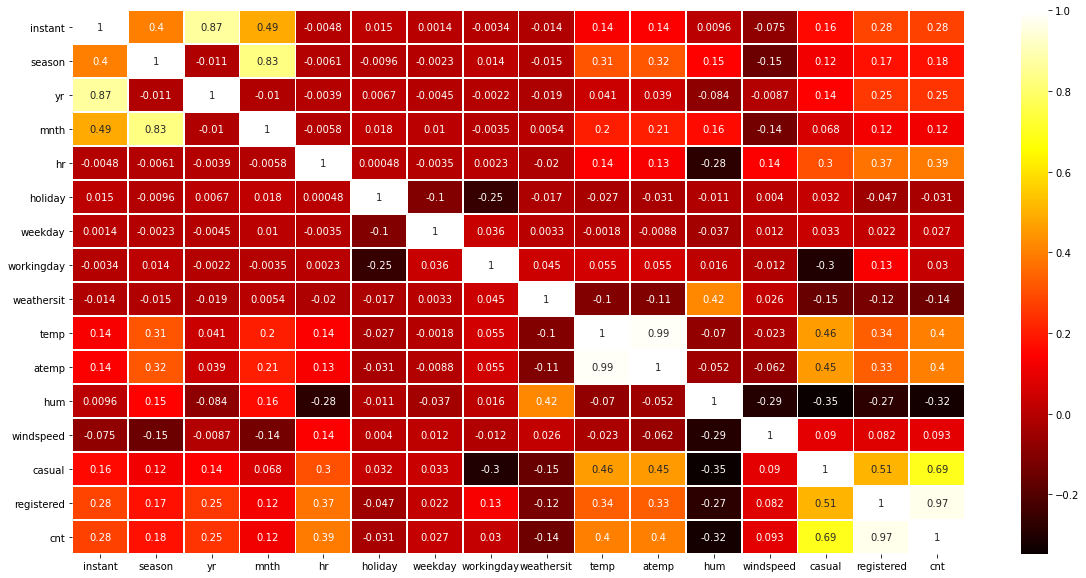

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df_Reg.corr(),annot=True, lineWidth = 0.5, cmap='hot')

<AxesSubplot:>

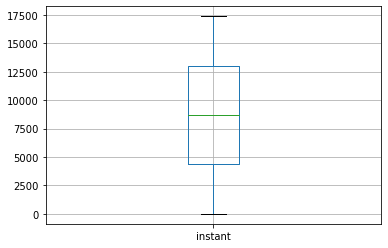

In [8]:
df_Reg.boxplot(column='instant')

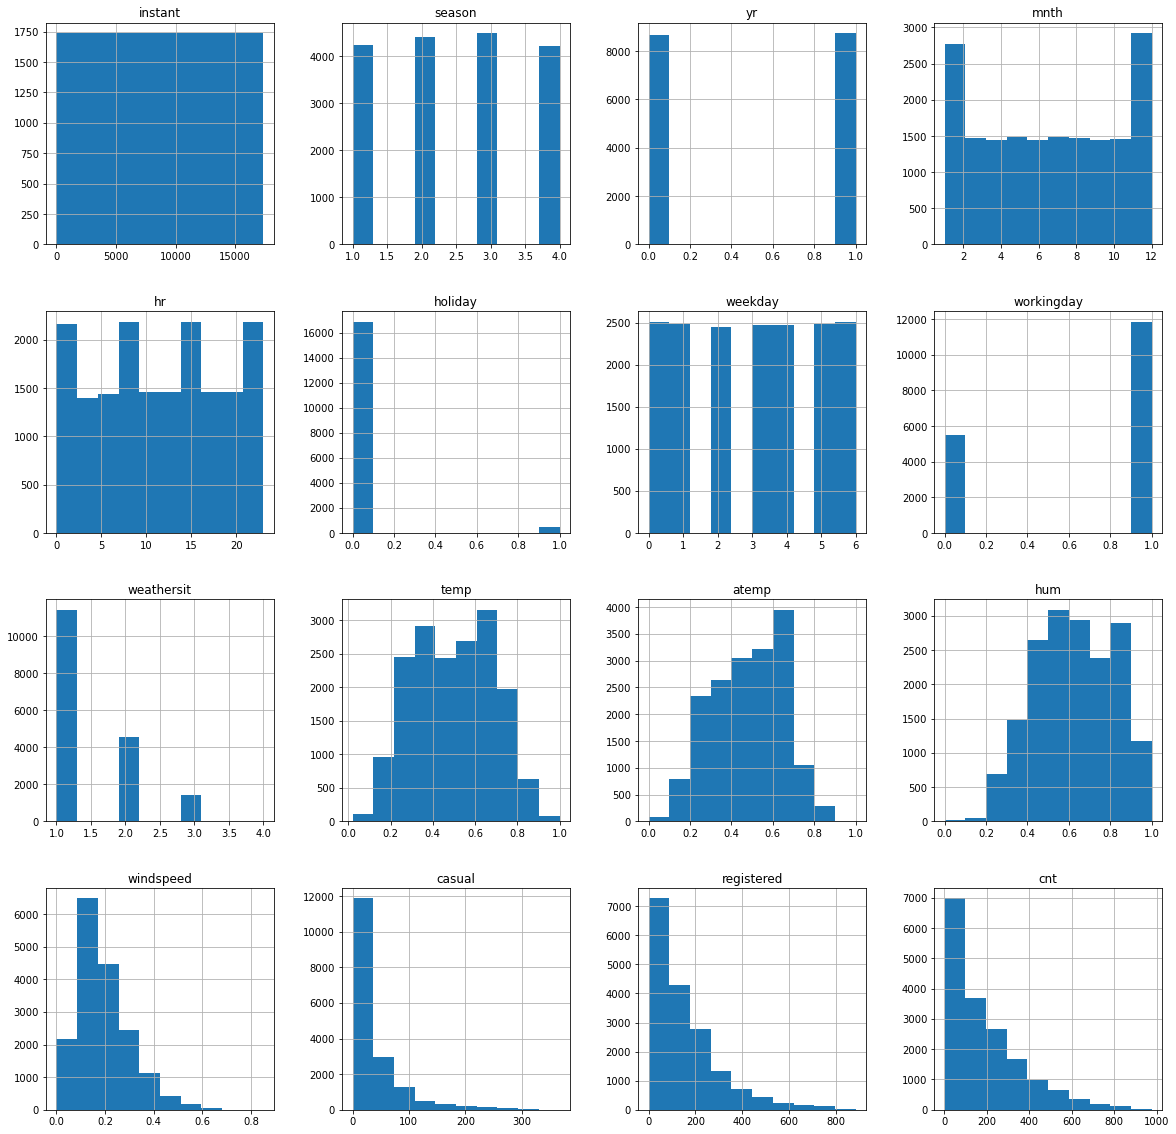

In [9]:
df_Reg.hist(figsize=(20,20))

plt.show()

<AxesSubplot:>

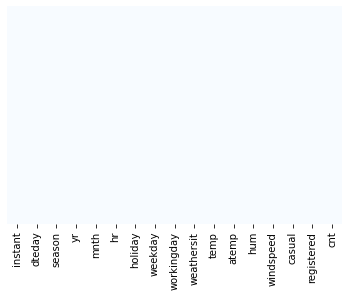

In [10]:
# Findout if we have any null values using graph
sns.heatmap(df_Reg.isnull(), yticklabels = False, cbar = False, cmap="Blues") #we do not have any null values

### II.4. Preliminary Observations: -

**Heatmap**: From intensity of the colours we can get the information about the correlation of each features. 1 means the maximum corelation. Diagonal value is mapped to itself, so it has the maximum correlation that is 1. From the graph we can observe that maximum corelation is between the cnt and registered which is 0.97. Minimum correlation between cnt and holiday is -0.031.

**Boxplot**: From the boxplot for instance we can observe that instance value lies in range of 0 t0 17500. So minimum value is 0 and maximum value is 17500. Whereas intermediate value lies between 7500 to 10000.

**Histogram**: From this graph we can observe the frequency of occurrence of data. The occurrence of each feature is mapped so we can get the distribution of data precisely.

**Heatmap**: This type of heatmap is used to show if data has any null values. From the graph we can observe that there is no null value in our data.

# III. Method

Summary of the linear models **least-squares and LMS** and explanation of implementation of **class** *Linear Model*. 
 
This section includes:

 - Review of the linear models 
 - Implementation and description

## III.1. Review of Linear models

The linear regression model relates a quantitative response variable to one or more quantitative exploratory variables. Linear model has the linear relationships. Statistical representation of the linear model is :-

                    y = a + b*x
Data can be represented as below in equation form for the linear regression: -

$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

Our main aim is to find the best fit linear line to all the data. We need to reduce the distance between the actual data points and the predicted points on the line. Hence minimum is the distance between the data points and the line better are the results. We calculate the cost error function as the Euclidean distance between the target data points and the output data points, using the below equation: -

$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$

### Least Squares

Least square regression helps to find the line of best fit. It can be used directly with appropriate data set with any function of the form: -

f(x;β)=β0+β1x1+β2x2+…

In Least square methods the unknown parameters are estimated by minimizing the sum of the squared deviations between the data and the model. LS regression is used primarily because of its effectiveness and completeness. LS cost function can be represented as below: - 

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

our goal is to minimise the cost function, for the minimization we calculate the derivative of the above function. we get below results: - 

$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top t
\end{align}
$$

### Least Mean Square

Least mean square uses the same input values, and its final aim is to find the best fit line for the data set. But as our data becomes exceptionally large that dealing with huge data sets can be costly. So, we use Sequential or online learning. In sequential learning process we introduce data one after the other and update the parameters sequential manner. In this method we start with some weight **w** and as we converge the data, we update this weight to minimize the cost function. Below is the equation for the cost function: - 

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

This equation is considered as the cost function where gradient for sum of squares error for the kth sample xk is calculated. This w represents the final weight and LMS for each is computed and weights are updated until we find the best fit.


## III.2. Explanation of codes

### III.2.a Super Class Definition:

A BaseModel class is implemented and it is the super class. BaseModel inherits from the ABC class that is available in python as Abstract base classes (ABC) in python. Two abstract methods that is **train** and **use** methods are implemented in the BaseModel class. Method definition will be defined in the classes which inherit the BaseModel class.

LinearModel class is implemented which inherits train and use methods from the BaseModel class but its definition is not implemented here. It implements its own methods like _check_matrix which is used to check if the matrix is 2-D or not and method add_ones is used to add a column of biased to passed matrix in its parameters. add_ones make it easier for matrix multiplication. LS and LMS algorithms will be implemented using these classes. LS and LMS are described in later section.

### III.2.b Least Squares Definition:

A class LinearRegress is implemented and it inherits from the LinearModel. A constructor is initialized. LinearRegress implements the two inherited methods that is train method and use method. train method is defined to train the model on the given data sets. train model takes two parameters X and T. add_ones method is implemented and it take X parameter as argument and w is used to calculate the weight. Here weights are calculated and returns trained results using the Least Squares. use method is implemented and it returns the result of the matrix multiplication X with the weights to get the desired output.

### III.2.c Least Mean Squares

Least Mean Square is implemented, and it will perform Least mean square on our data sets. LMS algorithm is used for the online learning on the data sets. LMS has its constructor initialized, a train method, train_step method and use method. These methods as inherited from the super class LinearModel. **train** method performs the batch training by using the train_step function. train method takes arguments X that in the input and T that is the output, which calls the train_step function. **train_step** function trains the model based on the formula. **use** method adds the basis to the calculated weight and input matrix so we get the best fit linear line.

## IV. Implementation of code

### IV.1. Implementation of the Super class

In [11]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

Inheriting the super class, we can define two difference classes for Least Squares and Least Mean Square algorithms. 

### IV.2 Implementation of LinearSquares

Below is the implementation of the Linearregression class. Method definition are written for the train and use methods.

In [12]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X =self.add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T
        pass
    
    # apply the learned model to data X
    def use(self, X):
        return self.add_ones(X) @ self.w

### IV.3 Implementation of LMS

Below LMS is implemented. Below the methods train, train_step and use are defined.

In [13]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for k in range(X.shape[0]):
            self.train_step(X[k], T[k])
        pass
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack((1,x))
        x = np.reshape(x, (-1,1))
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))        
        y = self.w.T @ x
        y = y - t
        self.w =self.w - (self.alpha * y * x)
        return self.w
    
    # apply the current model to data X
    def use(self, X):
        return self.add_ones(X) @ self.w

### Usage Examples

In [14]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

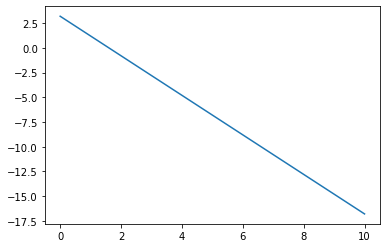

In [15]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

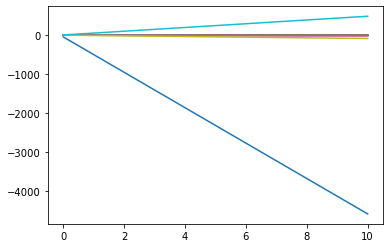

In [16]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

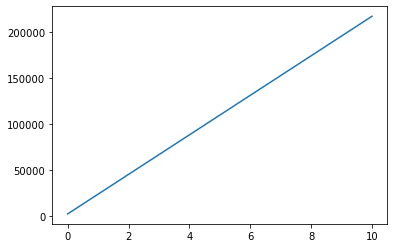

In [17]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs.

In [18]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    model.w = np.zeros((X.shape[1]+1, T.shape[1]))
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# IV. Experiments

Application of LS and LMS methods on the data sets. Experiment, result and related code are discussed below.

### IV.1 Experiment Description

The experiment is performed on the bike sharing data set **"hour.csv"**. LS and LMS methods are applied on the data set. The train function trains the input X and by generating the weights and produces the desired output. X is passed with all the independent variable columns from the data set except for the "cnt" column which is dependent variable or target.

The visualization of the actual values and predicted values are shown below in the graphs. From the below graphs we can understand that blue is the original graph and orange is the predicted graph. We can clearly see the deviation from the actual values in the graph.

As we can see in below codes we will remove two columns 'dteday' and 'instant' since the first one is of object type and former one is not required.

In [19]:
df_Reg.drop(columns=['dteday'],axis=1,inplace=True) 
df_Reg.drop(columns=['instant'],axis=1,inplace=True) 

In [20]:
df_Reg.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### IV.1.a LS implementation

Here we have used the **LS** algorithm to tarin the data set. In below code we are loading X with the input values that read the data from 'hour.csv' and it takes all the column except for the 'cnt'. T is loaded with the target value that is cnt. We will import the LinearRegression method and train the values with respect to the X and T. And graph is plotted for X with respect to the T.

In [21]:
X = df_Reg.loc[:,df_Reg.columns!='cnt'] 
T = df_Reg.cnt
ls = LinearRegress() 

ls.train(X, T)

### IV.2.a Visualization of plots for LS

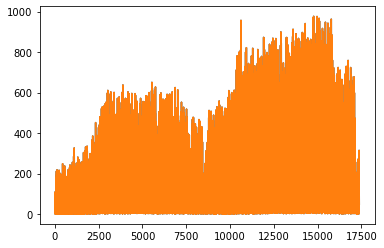

In [22]:
plt.plot(T.values)
plt.plot(ls.use(X))

Below is the code we use to train using values from X and T. We have compared the actual values with the predicted values. 

In [23]:
ls_act = LinearRegress() 
ls_act.train(X.values, T.values)
pred = ls_act.use(X.values)
pred, T.values

(array([16., 40., 32., ..., 90., 61., 49.]),
 array([16, 40, 32, ..., 90, 61, 49], dtype=int64))

Below code calculates the root mean square error for the LS

In [24]:
np.sqrt(np.mean((T.shape-ls.use(X.values))**2))

17190.49385065789

### IV.1.b LMS implementation

We have used the **LMS** algorithm below to find the best fit line for the given data set points. we have set the learning rate for the LMS as 5e-8. and using train_step model is trained at each step. and graph is plotted to show the actual output and the predicted output.

In [25]:
lms = LMS(5e-8)
for i, j in zip(X.values, T):

    lms.train_step(i, j) 

### IV.2.b Visualization of results

Below code is implemented to apply the LMS algorithm and plot the graph to show the plot between the actual values and the predicted values

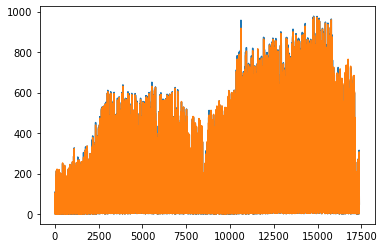

In [26]:
plt.plot(T.values)
plt.plot(lms.use(X.values))

As observed from the above plot are the predicted values of LMS. Blue line is the actual output and orange line is the predicted output.

Below code compares the output values with the actual values.

In [27]:
lms.use(X.values), T.values

(array([[15.82079908],
        [39.22628928],
        [31.86302886],
        ...,
        [92.75774277],
        [62.3852843 ],
        [50.58327871]]),
 array([16, 40, 32, ..., 90, 61, 49], dtype=int64))

Below code calculates the root mean square error for the LS

In [28]:
np.sqrt(np.mean((T.shape-lms.use(X.values))**2))

17193.578030530807

## IV.3.b Analysis of algorithms:

Two Algorithms names Least Squares(LS) and Least mean square(LMS) are used here in linear regression model. **Linear Regression** is a type of regression technique. These techniques vary according to the relationship between the dependent and independent variables. Linear regression is a type of regression where the relationship between the dependent and the independent variables is linear.

Based on the available data we try to plot the best fit straight line. We determine the line as best fit, if the distance between the data points to the predicted straight line is minimum than the line is best fit. 

Here is when the cost function comes to the picture. So, to reduce the cost function we use different methods to reduce the distance between the straight line and the data points. In this assignment we are using the Least squares and Least Mean Squares.

**Least Squares(LS)** is a technique the optimum parameter is defined as such that minimizes the sum of mean squared loss. To process the data set in the LS we use the entire data set. We process the complete data set in the LS and after processing the entire dataset we predict the output values on the entire data set. 

In the Least Squares method, the unknown parameters are estimated by minimizing the sum of the squared deviations between the model and data.

The advantage of the LS algorithm is its effectiveness and completeness while processing the model. 

The disadvantage of the LS is limitation in shapes that linear model can assume over ranges, sensitivity to the outliers and poor extrapolation properties.

**Least Mean Square(LMS)** is a technique used in the Linear Regression to minimize the cost function. The idea to use the LMS is that as we have our data values, the output values and LMS is supposed to optimize the cost function. 

Our goal is to minimize the sum of squared errors. LMS is and iterative method and the steepest descent algorithm for solving the normal equations. Here data is trained using the online method. Here main objective is minimizing the mean squared error. We use weights and as we train the data, we update our weights.

## IV.3.b Comparison of algorithms:

In the Linear Regression model, we used two algorithms Least squares (LS) and Least mean square (LMS). The main difference is that LMS follows step by step learning process also called online learning. Whereas LS trains the model on entire data set and generates output on entire data set.

We can observe from the above experiment that for lms the output varies as we change the learning rate. we have used the learning rate of 5e-8 as optimal learning rate. But as we increase the learning rate accuracy also increases. But if we keep on increasing the learning rate the model may fail to find the best fit line.

We have also observed that the weights for the LS algorithm is calculated using the formula. Whereas for the LMS we have two weights that is K and K+1. K is for one instance and K+1 is for next instance. At first weight is randomised and calculated after.

From the above experiment results we can find out that the Linear Regression model finds the best fit as compared to the LMS. LS was able to find the values closer to the target values than in LSM.

Root mean square calculates the deviation of the predicted value from the actual value. We can see that for LS root mean square is calculated as 17190.49 whereas for the LMS we have observed the root mean square as 17193.57

# V.1 Conclusions

I was able to grasp the in depth knowledge from the assignment Linear Regression. Linear Regression is a good model to train on the data sets with continuous values. We were able to understand how the LS and LMS algorithm works and its implementation. How the formulas are used to train the model and predict the output. 

This assignment covers the implementation as well as theoretical part on the Least square and Least mean square algorithms. Implementation of these algorithm helps to understand find the best fit line on the data sets. A cost function is used to minimize the distance between the actual values and the output values so as to get the best predicted results.

Graph plots were covered in the assignment helps to get the proper understanding of the data visualization, data comparison, plot of actual vs predicted helps to understand the how close our predicted data to the actual values.

Calculation the RMSE values helps us to understand the efficiency of the algorithms and how we have used and implemented the different methods to train and plot the graph.

# V.2 References

UCI Machine Learning Repository: Bike Sharing Dataset Data Set
Bike Sharing Dataset Data Set Download: Data Folder, Data Set Description. Abstract: This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: concepts, tools, and techniques to build intelligent systems
Géron - O'Reilly Media, Inc. - 2019

Simple Linear Regression: A Practical Implementation in Python
We don’t need to apply feature scaling for linear regression as libraries take care of it. 4. Fitting linear regression model into the training set. From sklearn’s linear model library, import linear regression class. Create an object for a linear regression class called regressor.
https://www.askpython.com/python/examples/linear-regression-in-python

Simple Linear Regression Model using Python: Machine ...
y_train data after splitting. Building and training the model Using the following two packages, we can build a simple linear regression model.. statsmodel; sklearn; First, we’ll build the model using the statsmodel package. To do that, we need to import the statsmodel.api library to perform linear regression.. By default, the statsmodel library fits a line that passes through the origin.
https://towardsdatascience.com/simple-linear-regression-model-using-python-machine

Matplotlib: Python plotting — Matplotlib 3.3.2 documentation
Matplotlib is a Sponsored Project of NumFOCUS, a 501(c)(3) nonprofit charity in the United States. NumFOCUS provides Matplotlib with fiscal, legal, and administrative support to help ensure the health and sustainability of the project. Visit numfocus.org for more information. Donations to Matplotlib are managed by NumFOCUS.
https://matplotlib.org

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 